<font size="6"> **Modelling**

In the previous notebook, the data was prepared to develop a model using different algorithms. The missing values of dataset was imputed, the target variable was deteremined, and the data set was splitted into train and test set. The numerical values were scaled using standardscaler method and categorical variables were encoded using get_dummies method. The data was prepared for modelling and logistic regression was used intially to perform the model development. However we have encountered with imbalanced classification data.

In this notebook, the train/test dataset developed from the previous notebook will be used to develop models. Before we apply the algorithms to the data, the highly imbalanced data will be dealt before we apply the algorithms. Therefore, the data set will be resampled using three different resamplping technique and three different algorithms will be applied to each balanced datasets to produce models. 

Load the necessary data and tools.

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('..\Capstone-2-Data-wranglling\preprocessed.csv',index_col='id')
X_train=pd.read_csv('..\Capstone-2-Data-wranglling\X_train.csv',index_col='id')
y_train=pd.read_csv('..\Capstone-2-Data-wranglling\y_train.csv',index_col='id')
X_test=pd.read_csv('..\Capstone-2-Data-wranglling\X_test.csv',index_col='id')
y_test=pd.read_csv('..\Capstone-2-Data-wranglling\y_test.csv',index_col='id')

In [5]:
X_train.shape

(3576, 20)

In [6]:
y_train.shape

(3576, 1)

In [7]:
y_train.value_counts()

stroke
0         3402
1          174
dtype: int64

<font size="4">**Dealing with Imbalanced Dataset**
    

Three different train and test samples were resampled with different resampling technique.Two Oversampling technique(SMOTE and ADASYN) and one Undersampling(RandomUndersampler) were used to produce new train and test samples.

In [8]:
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [9]:
RUS=RandomUnderSampler()
X_train_us,y_train_us=RUS.fit_resample(X_train,y_train)

In [10]:
AD=ADASYN()
X_train_ad,y_train_ad=AD.fit_resample(X_train,y_train)

Shape and proportion of each train/test samples are checked to make confrim, resampling techniques are applied appropriately.

In [11]:
X_train_sm.shape

(6804, 20)

In [12]:
y_train_sm.value_counts()

stroke
0         3402
1         3402
dtype: int64

In [13]:
X_train_us.shape

(348, 20)

In [14]:
y_train_us.value_counts()

stroke
0         174
1         174
dtype: int64

In [15]:
y_train_ad.value_counts()

stroke
0         3402
1         3334
dtype: int64

Logistic Regression for resampled with SMOTE method was developed to see the difference from the previous notebook(Logistic Regression with before resampling).

In [16]:
LR=LogisticRegression()
LR.fit(X_train_sm,y_train_sm)
ypred=LR.predict(X_test)

In [17]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1458
           1       0.19      0.53      0.28        75

    accuracy                           0.86      1533
   macro avg       0.58      0.71      0.60      1533
weighted avg       0.93      0.86      0.89      1533



In [18]:
print(accuracy_score(y_test,ypred))

0.8636660143509458


In [19]:
cf_mat=confusion_matrix(y_test,ypred)
cf_mat

array([[1284,  174],
       [  35,   40]], dtype=int64)

As the calssification report showw, it has improved recall score dramatically from 0.03 to 0.52.

<font size="4">**Modelling with Oversmapled Dataset(SMOTE Method)**

Three different algorithms were used to develop a model with resampled (SMOTE technique) train/test sets.

First, RandomForestClassifier was used to develop a model.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RF=RandomForestClassifier(random_state=0,oob_score=True)
RF.fit(X_train_sm,y_train_sm)
ypredRF=RF.predict(X_test)

In [22]:
print(RF.oob_score_)

0.9594356261022927


In [23]:
acc_RF=accuracy_score(y_test,ypredRF)
prec_RF=precision_score(y_test,ypredRF)
rec_RF=recall_score(y_test,ypredRF)
f1_RF=f1_score(y_test,ypredRF)

In [24]:
print(classification_report(y_test,ypredRF))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.13      0.16      0.15        75

    accuracy                           0.91      1533
   macro avg       0.54      0.55      0.55      1533
weighted avg       0.92      0.91      0.91      1533



In [25]:
cfrf=confusion_matrix(y_test,ypredRF)
cfrf

array([[1380,   78],
       [  63,   12]], dtype=int64)

XGBoost Classifier was used secondly, to develop another model.

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb=XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='error')
xgb.fit(X_train_sm,y_train_sm)
ypred_xgb=xgb.predict(X_test)


In [28]:
print(confusion_matrix(y_test,ypred_xgb))

[[1346  112]
 [  54   21]]


In [29]:
print(classification_report(y_test,ypred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
           1       0.16      0.28      0.20        75

    accuracy                           0.89      1533
   macro avg       0.56      0.60      0.57      1533
weighted avg       0.92      0.89      0.91      1533



In [30]:
acc_xgb_sm=accuracy_score(y_test,ypred_xgb)
prec_xgb_sm=precision_score(y_test,ypred_xgb)
rec_xgb_sm=recall_score(y_test,ypred_xgb)
f1_xgb_sm=f1_score(y_test,ypred_xgb)

Lastly, LGBM Classifier was used to develop a model.

In [31]:
from lightgbm import LGBMClassifier

In [32]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_sm,y_train_sm)
ypred_lgbm=lgbm.predict(X_test)

In [33]:
print(confusion_matrix(y_test,ypred_lgbm))

[[1393   65]
 [  61   14]]


In [34]:
print(classification_report(y_test,ypred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.18      0.19      0.18        75

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



In [35]:
acc_lgbm_sm=accuracy_score(y_test,ypred_lgbm)
prec_lgbm_sm=precision_score(y_test,ypred_lgbm)
rec_lgbm_sm=recall_score(y_test,ypred_lgbm)
f1_lgbm_sm=f1_score(y_test,ypred_lgbm)

<font size="4">**Modelling With Oversampled Dataset (ADASYN Method)**

Other models were developed with same algorithms but different resampling technique(ADASYN Method)

First, RandomForest Classifier with ADASYN oversampling techinque used train/test samples.

In [36]:
RF=RandomForestClassifier(random_state=0,oob_score=True)
RF.fit(X_train_ad,y_train_ad)
ypredRF_ad=RF.predict(X_test)

In [37]:
print(RF.oob_score_)

0.9612529691211401


In [38]:
print(classification_report(y_test,ypredRF_ad))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.14      0.17      0.15        75

    accuracy                           0.91      1533
   macro avg       0.55      0.56      0.55      1533
weighted avg       0.92      0.91      0.91      1533



In [39]:
cfrf=confusion_matrix(y_test,ypredRF_ad)
cfrf

array([[1378,   80],
       [  62,   13]], dtype=int64)

In [40]:
acc_RF_ad=accuracy_score(y_test,ypredRF_ad)
prec_RF_ad=precision_score(y_test,ypredRF_ad)
rec_RF_ad=recall_score(y_test,ypredRF_ad)
f1_RF_ad=f1_score(y_test,ypredRF_ad)

XGBoost Classifier algorithm was used with ADASYN resampled train/test sets.

In [41]:
xgb=XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='error')
xgb.fit(X_train_ad,y_train_ad)
ypred_xgb_ad=xgb.predict(X_test)


In [42]:
print(confusion_matrix(y_test,ypred_xgb_ad))

[[1356  102]
 [  52   23]]


In [43]:
print(classification_report(y_test,ypred_xgb_ad))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1458
           1       0.18      0.31      0.23        75

    accuracy                           0.90      1533
   macro avg       0.57      0.62      0.59      1533
weighted avg       0.92      0.90      0.91      1533



In [44]:
acc_xgb_ad=accuracy_score(y_test,ypred_xgb_ad)
prec_xgb_ad=precision_score(y_test,ypred_xgb_ad)
rec_xgb_ad=recall_score(y_test,ypred_xgb_ad)
f1_xgb_ad=f1_score(y_test,ypred_xgb_ad)

Lastly, LGBM Classifier with ADASYN samples.

In [45]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_ad,y_train_ad)
ypred_lgbm_ad=lgbm.predict(X_test)

In [46]:
print(classification_report(y_test,ypred_lgbm_ad))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1458
           1       0.18      0.20      0.19        75

    accuracy                           0.92      1533
   macro avg       0.57      0.58      0.57      1533
weighted avg       0.92      0.92      0.92      1533



In [47]:
print(confusion_matrix(y_test,ypred_lgbm_ad))

[[1388   70]
 [  60   15]]


In [48]:
acc_lgbm_ad=accuracy_score(y_test,ypred_lgbm_ad)
prec_lgbm_ad=precision_score(y_test,ypred_lgbm_ad)
rec_lgbm_ad=recall_score(y_test,ypred_lgbm_ad)
f1_lgbm_ad=f1_score(y_test,ypred_lgbm_ad)

<font size="4">**Modelling with undersampled dataset(RandomUndersampler)**



Lastly. same algorithms with another train/test sets used undersampling technique.

First, RandomForest Classifier.

In [49]:
RF=RandomForestClassifier(random_state=0,oob_score=True)
RF.fit(X_train_us,y_train_us)
ypred_RF_us=RF.predict(X_test)

In [50]:
print(confusion_matrix(y_test,ypred_RF_us))

[[1033  425]
 [  22   53]]


In [51]:
print(classification_report(y_test,ypred_RF_us))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1458
           1       0.11      0.71      0.19        75

    accuracy                           0.71      1533
   macro avg       0.55      0.71      0.51      1533
weighted avg       0.94      0.71      0.79      1533



In [52]:
print(RF.oob_score_)

0.7528735632183908


In [53]:
acc_RF_us=accuracy_score(y_test,ypred_RF_us)
prec_RF_us=precision_score(y_test,ypred_RF_us)
rec_RF_us=recall_score(y_test,ypred_RF_us)
f1_RF_us=f1_score(y_test,ypred_RF_us)

Secondly, XGBoost Classifier.

In [54]:
xgb=XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='error')
xgb.fit(X_train_us,y_train_us)
ypred_xgb_us=xgb.predict(X_test)


In [55]:
print(classification_report(y_test,ypred_xgb_us))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1458
           1       0.10      0.68      0.18        75

    accuracy                           0.70      1533
   macro avg       0.54      0.69      0.50      1533
weighted avg       0.93      0.70      0.79      1533



In [56]:
print(confusion_matrix(y_test,ypred_xgb_us))

[[1022  436]
 [  24   51]]


In [57]:
acc_xgb_us=accuracy_score(y_test,ypred_xgb_us)
prec_xgb_us=precision_score(y_test,ypred_xgb_us)
rec_xgb_us=recall_score(y_test,ypred_xgb_us)
f1_xgb_us=f1_score(y_test,ypred_xgb_us)

Lastly, LGBM Classifier with undersampled train/test sets.

In [58]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_us,y_train_us)
ypred_lgbm_us=lgbm.predict(X_test)

In [59]:
print(classification_report(y_test,ypred_lgbm_us))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1458
           1       0.12      0.77      0.21        75

    accuracy                           0.71      1533
   macro avg       0.55      0.74      0.51      1533
weighted avg       0.94      0.71      0.79      1533



In [60]:
print(confusion_matrix(y_test,ypred_lgbm_us))

[[1027  431]
 [  17   58]]


In [61]:
acc_lgbm_us=accuracy_score(y_test,ypred_lgbm_us)
prec_lgbm_us=precision_score(y_test,ypred_lgbm_us)
rec_lgbm_us=recall_score(y_test,ypred_lgbm_us)
f1_lgbm_us=f1_score(y_test,ypred_lgbm_us)

Next, a table was created with all the scores stored for each algorithm and resampling techinque in different variables for comparison

In [62]:
table=[]

In [63]:
t1=[acc_RF,prec_RF,rec_RF,f1_RF]
t2=[acc_xgb_sm,prec_xgb_sm,rec_xgb_sm,f1_xgb_sm]
t3=[acc_lgbm_sm,prec_lgbm_sm,rec_lgbm_sm,f1_lgbm_sm]
t4=[acc_RF_ad,prec_RF_ad,rec_RF_ad,f1_RF_ad]
t5=[acc_xgb_ad,prec_xgb_ad,rec_xgb_ad,f1_xgb_ad]
t6=[acc_lgbm_ad,prec_lgbm_ad,rec_lgbm_ad,f1_lgbm_ad]
t7=[acc_RF_us,prec_RF_us,rec_RF_us,f1_RF_us]
t8=[acc_xgb_us,prec_xgb_us,rec_xgb_us,f1_xgb_us]
t9=[acc_lgbm_us,prec_lgbm_us,rec_lgbm_us,f1_lgbm_us]

Dataframe is created and list of scores for each algorithms are appended to the table.

In [64]:
table.append(t1)
df2 = pd.DataFrame(table,index=['Random Forest SMOTE'],columns=['Accuracy_score','Precision_score','Recall','F1Score'])

In [65]:
df2.loc[len(df2)]=t2
df2.loc[len(df2)]=t3
df2.loc[len(df2)]=t4
df2.loc[len(df2)]=t5
df2.loc[len(df2)]=t6
df2.loc[len(df2)]=t7
df2.loc[len(df2)]=t8
df2.loc[len(df2)]=t9

Table with accuracy, precision, recall and F1 score for each algorithm and resampling technique is created.

In [66]:
df2=df2.rename(index={1:'XGBoost SMOTE',2:'LGBM SMOTE',3:'Random Forest ADASYN',4:'XGBoost Adasyn',5:'LGBM ADASYN',6:'Random Forest Undersample',7:'XGBoost Undersample',8:'LGBM Undersample'})
df2.sort_values(by='Accuracy_score',ascending=False)

,Accuracy_score,Precision_score,Recall,F1Score
LGBM SMOTE,0.917808,0.177215,0.186667,0.181818
LGBM ADASYN,0.915199,0.176471,0.200000,0.187500
Random Forest SMOTE,0.908023,0.133333,0.160000,0.145455
Random Forest ADASYN,0.907371,0.139785,0.173333,0.154762
XGBoost Adasyn,0.899543,0.184000,0.306667,0.230000
XGBoost SMOTE,0.891716,0.157895,0.280000,0.201923
Random Forest Undersample,0.708415,0.110879,0.706667,0.191682
LGBM Undersample,0.707763,0.118609,0.773333,0.205674
XGBoost Undersample,0.699935,0.104723,0.680000,0.181495


The table above was ordered with accuracy score of each model and LGBM had highest accuracy score. Overall, all the models trained with SMOTE resampling techinque used has high scores in general.

<font size="4">**Model Hyperparameter Tuning (Oversampled Data with SMOTE)**

RandomForest Classifier hyperparameter tuning using GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid={
    'n_estimators':np.arange(1,50),
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy'],
    'max_features':[3,5,7],
    'min_samples_split':[1,2,3]
           }

In [107]:
RF=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=RF,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring="recall")
rf_grid.fit(X_train_ad,y_train_ad)
y_pred_rf=rf_grid.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1458
           1       0.10      0.73      0.18        75

    accuracy                           0.67      1533
   macro avg       0.54      0.70      0.48      1533
weighted avg       0.94      0.67      0.76      1533

[[965 493]
 [ 20  55]]


In [127]:
clf_rpt=classification_report(y_test,y_pred_rf,target_names=['negative','positive'])

In [116]:
from sklearn.metrics import precision_score

In [121]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.9550081806741825
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'n_estimators': 41}


RandomForest Classifier hyperparameter tuning using ParameterGrid(oob_score)

In [71]:
from sklearn.model_selection import ParameterGrid

In [72]:
rf=RandomForestClassifier(oob_score=True)
param_grid={
    'n_estimators':np.arange(1,50),
    'max_depth':[5,6,7,8],
    'criterion':['gini','entropy'],
    'max_features':[3,5,7],
    #'min_samples_split':[2,3,4]
           }

In [73]:
best_score=0
for g in ParameterGrid(param_grid):
    rf.set_params(**g)
    rf.fit(X_train_sm,y_train_sm)
    # save if best
    if rf.oob_score_ > best_score:
        best_score = rf.oob_score_
        best_grid = g

print ("OOB: %0.5f" % best_score) 
print ("Grid:", best_grid)

OOB: 0.88580
Grid: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'n_estimators': 38}


In [81]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 3, n_estimators=34)
rf.fit(X_train_sm,y_train_sm)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
y_scores_rf=rf.predict_proba(X_test)[:,1]
f_rf,t_rf,_=roc_curve(y_test,y_scores_rf)
roc_auc_rf=auc(f_rf,t_rf)
print(round(roc_auc_rf,2))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1458
           1       0.11      0.56      0.18        75

    accuracy                           0.75      1533
   macro avg       0.54      0.66      0.52      1533
weighted avg       0.93      0.75      0.82      1533

0.76


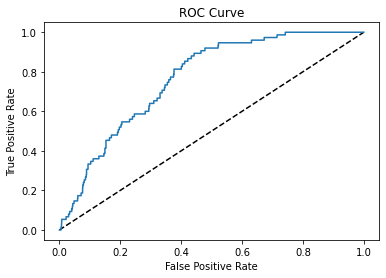

In [82]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(f_rf, t_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Two method was used for hyperparameter tuning of RandomForestClassifier. First is gridsearchCV and the second method was using parameter grid by best oob score.

Hyperparameter tuning of XGBoost Classifier using RandomizedSearchCV

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
xgb=XGBClassifier(objective='binary:logistic',random_state=0,eval_metric='auc',)
params={ 'max_depth': [3, 5, 6, 10],
           'learning_rate': [0.1, 0.2, 0.3, 0.4],
           'subsample': np.arange(0.6, 0.8, 1.0),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000,10000]}
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,n_jobs=4,verbose=2,scoring='recall')
random_search.fit(X_train_sm,y_train_sm)
rs_ypred=random_search.predict(X_test)
print(random_search.best_params_)
print(random_search.best_score_)
print(confusion_matrix(y_test,rs_ypred))
print(classification_report(y_test,rs_ypred))
y_scores_xgb=random_search.predict_proba(X_test)[:,1]
f_xgb,t_xgb,_=roc_curve(y_test,rs_ypred)
roc_auc_xgb=auc(f_xgb,t_xgb)
print(round(roc_auc_xgb,2))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
0.9623572600846506
[[1400   58]
 [  63   12]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.17      0.16      0.17        75

    accuracy                           0.92      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.92      0.92      0.92      1533

0.56


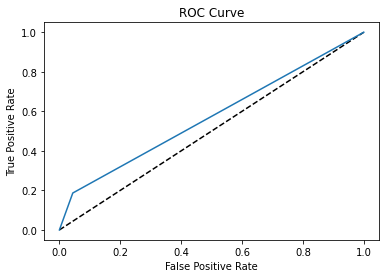

In [89]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(f_xgb, t_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Hyperparameter tuning of LGBM Classifier using RandomizedSearchCV

In [112]:
lgbm=LGBMClassifier()
params_lgbm = {
    'learning_rate': [0.05,0.01,0.0001],
    'num_leaves': [90,140,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [4,5,6,7],
    'random_state' : [42], 
    'colsample_bytree' : [0.6,0.7,0.8,1.0],
    'subsample' : [0.5,0.6,0.7,0.8,1.0],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }
clf=LGBMClassifier()
LGBMRS=RandomizedSearchCV(clf,param_distributions=params_lgbm,verbose=2,cv=10,n_jobs=-1,n_iter=10,scoring='recall')
LGBMRS.fit(X_train_ad,y_train_ad)
ypred_lgbm=LGBMRS.predict(X_test)
print(LGBMRS.best_params_)
print(LGBMRS.best_score_)
print(confusion_matrix(y_test,ypred_lgbm))
print(classification_report(y_test,ypred_lgbm))
y_scores_lgbm=LGBMRS.predict_proba(X_test)[:,1]
f_lgbm,t_lgbm,_=roc_curve(y_test,ypred_lgbm)
roc_auc_lgbm=auc(f_lgbm,t_lgbm)
print(round(roc_auc_lgbm,2))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
{'subsample': 0.6, 'random_state': 42, 'objective': 'binary', 'num_leaves': 140, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'auc', 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt'}
0.9454154753555952
[[1151  307]
 [  30   45]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1458
           1       0.13      0.60      0.21        75

    accuracy                           0.78      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.78      0.84      1533

0.69


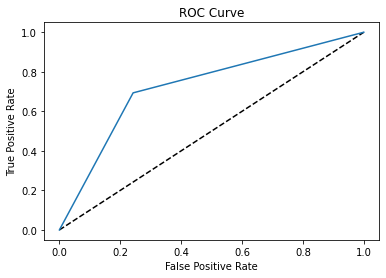

In [110]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(f_lgbm, t_lgbm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [146]:
data={'precision, class:negative':[0.98,0.96,0.97],'precision, class:positive':[0.10,0.19,0.13],'recall, class:negative':[0.66,0.96,0.87],
     'recall, class:positive':[0.73,0.16,0.60],'f1, class:negative':[0.79,0.96,0.87],'f1, class:positive':[0.18,0.19,0.21],'ROC_AUC':[0.76,0.57,0.69],'total negative':[1458,1458,1458],'total positive':[75,75,75]}
table_final=pd.DataFrame.from_dict(data)
table_final=table_final.rename(index={0:'Random Forest',1:'XGBoost',2:'LGBM'})
table_final

,"precision, class:negative","precision, class:positive","recall, class:negative","recall, class:positive","f1, class:negative","f1, class:positive",ROC_AUC,total negative,total positive
Random Forest,0.98,0.10,0.66,0.73,0.79,0.18,0.76,1458,75
XGBoost,0.96,0.19,0.96,0.19,0.96,0.19,0.57,1458,75
LGBM,0.97,0.13,0.87,0.60,0.87,0.21,0.69,1458,75


### Feature Importance

Since Random Forest Classifier performed the best out of the three models, importance of each feature was calculated with the RandomForestClassifier model.

In [83]:
X_train_sm.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [81]:
importances=rf_grid.best_estimator_.feature_importances_
importances

array([0.43006828, 0.00312992, 0.00063255, 0.07222661, 0.04891421,
       0.00818573, 0.00894652, 0.19485899, 0.01811299, 0.00985232,
       0.        , 0.01401881, 0.00354155, 0.09902526, 0.00507552,
       0.00328295, 0.02972464, 0.00166641, 0.03956406, 0.00917267])

In [119]:
std = np.std([tree.feature_importances_ for tree in rf_grid.best_estimator_], axis=0)

In [120]:
std=pd.Series(std11,index=X_train_sm.columns)
std.sort_values(ascending=False)
std11=std11.head(9)

In [121]:
forest_importances1=forest_importances.sort_values(ascending=False).head(9)

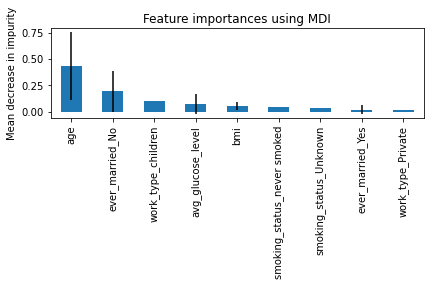

In [122]:
forest_importances = pd.Series(importances, index=X_train_sm.columns)

fig, ax = plt.subplots()
forest_importances1.plot.bar(yerr=std111, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Top 9 features were plotted on the graph above and as a result, Age was the most imporatant feature that affects the cause of stroke. Martial Status, work type, glucose level and bmi are followed by the orders.

<font size="4"> Conclusion

Stroke prediction models were developed using different classification models including:
- RandomForestClassification
- XGBoost Classifier
- LGBM Classifier

Also different train/test samples were used to develop the models. Resampling techinques using SMOTE and ADASYN method from over sampling and Random Undersampling from undersampling technique to deal with imbalanced classification. 
To evaluate the model performance, accuracy, precision, recall and F1 scores were calculated. Models with high accruracy scores were used for tuning to identify the hyperparameter of each models. 
For model tuning, GridSearchCV, ParameterGrid(oob_score),RandomizedSearchCV were used to determine the hyperparameter.
The optimized hyperparameters were used to calculate the ROC-AUC score and the RandomForestClassifier had the highest score with 0.76.

The RandomForest Classifier algorithm model would be appropriate since it performs the best out of 3 models. Also, for this case, it is very important to optimize the minimal False Negative and maximize the True Positive. The goal of this model is to predict the stroke cases and having a large number of false negative would completely fail the purpose of the model. Therefore even if the model has high false positive, it is better to have lower false negative because there should not be a single person who thinks they do not have stroke when they actually do. This is the reason why recall score was prioritized when hyperparameter tunings were conducted for each models.